## 숫자 데이터 확인

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드


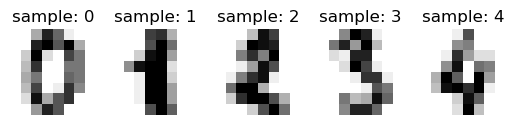

In [42]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'sample: {label}')


In [43]:
for i in range(5):
    print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [44]:
X = digits.data # 이미지. 즉, 특성 행렬.  1열 64차원 벡터 저장
Y = digits.target # 각 이미지에 대한 레이블

## 다층 퍼셉트론 분류기 적용

In [45]:
import torch
import torch.nn as nn
from torch import optim

In [46]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [47]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [48]:
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.
optimizer = optim.Adam(model.parameters())

In [49]:
losses = []
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forward 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
              epoch, 100, loss.item()
          ))

    losses.append(loss.item())

Epoch    0/100 Cost: 2.461077
Epoch   10/100 Cost: 2.128923
Epoch   20/100 Cost: 1.897524
Epoch   30/100 Cost: 1.611645
Epoch   40/100 Cost: 1.322724
Epoch   50/100 Cost: 1.041713
Epoch   60/100 Cost: 0.767062
Epoch   70/100 Cost: 0.530658
Epoch   80/100 Cost: 0.370989
Epoch   90/100 Cost: 0.276737


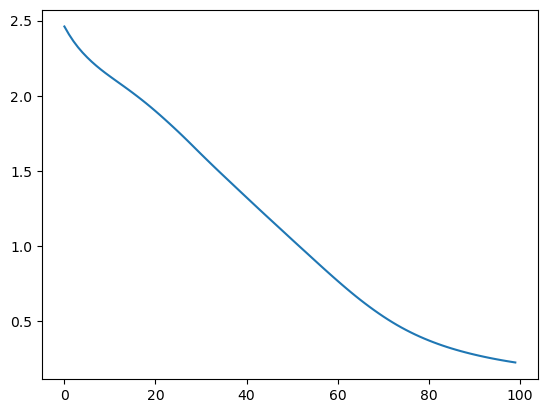

In [50]:
plt.plot(losses)